In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jangwon/.png


In [29]:
pip install imgaug

Note: you may need to restart the kernel to use updated packages.


In [30]:
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

In [31]:
import os

os.listdir("/kaggle/input/jangwon")

['.png']

In [32]:
image = Image.open("/kaggle/input/jangwon/.png")

In [33]:
print(image.height,image.width)
image.size


451 667


(667, 451)

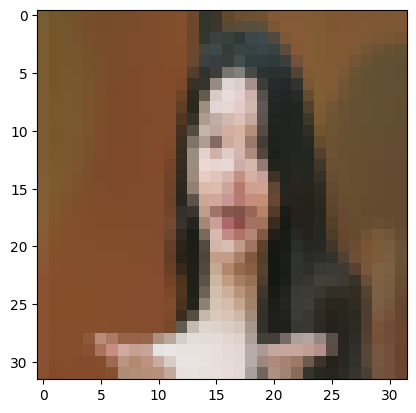

In [34]:
transform = transforms.Compose(
    [
        transforms.Resize(size=(32,32)),
        transforms.ToTensor()
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image.permute(1,2,0))


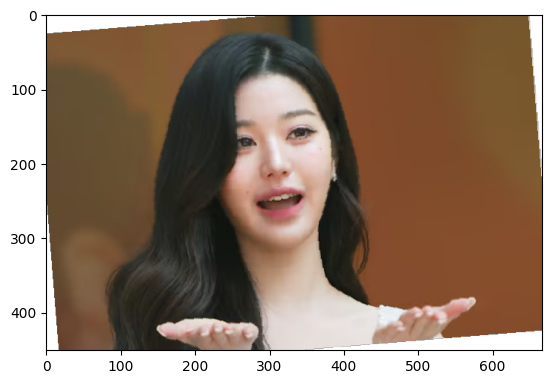

In [44]:
transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=1),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)

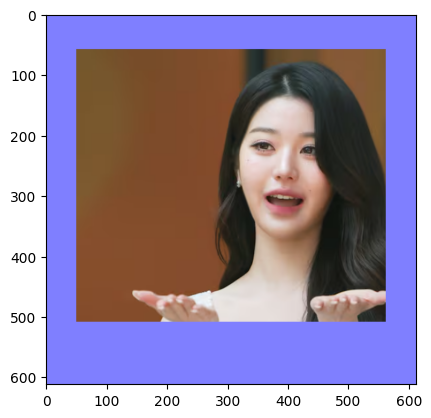

In [57]:
transform = transforms.Compose([
    transforms.RandomCrop(
        size=(512, 512),
        pad_if_needed=True,
        fill=(127, 127, 255, 255),  # RGBA: 마지막 값은 알파(투명도)
        padding_mode="constant"
    ),
    transforms.Pad(padding=50, fill=(127, 127, 255, 255), padding_mode="constant")
])
transformed_image = transform(image)
plt.imshow(transformed_image)




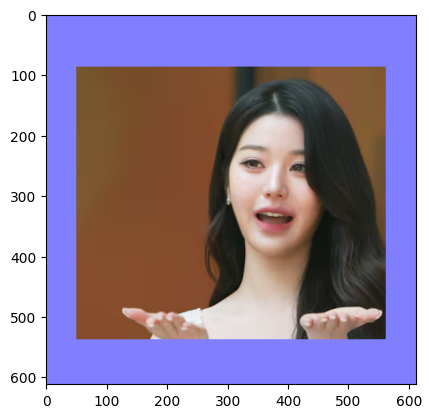

In [68]:
transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert("RGB")),  # 4채널 → 3채널 변환
    transforms.RandomCrop(
        size=(512, 512),
        pad_if_needed=True,
        fill=(127, 127, 255),  # 3채널에 맞는 값
        padding_mode="constant"
    ),
    transforms.Pad(padding=50, fill=(127, 127, 255), padding_mode="constant")
])
transformed_image = transform(image)
plt.imshow(transformed_image)


이미지 비우기

In [69]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])


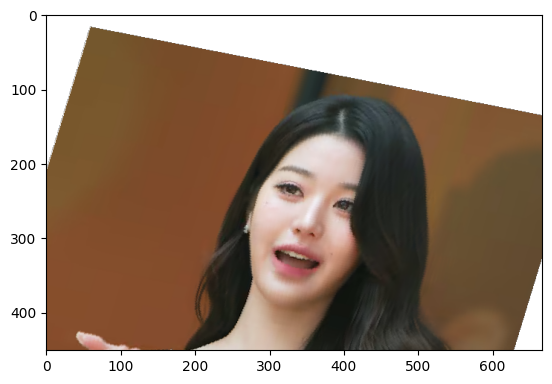

In [70]:
transform = transforms.Compose(
    [
        # 각도(degrees), 
        # 이동(translate)
        # 척도(scale)
        # 전단(shear)
        transforms.RandomAffine(
            degrees=30, translate=(0.2, 0.2),
            scale=(0.8, 1.2), shear=15
        )
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)


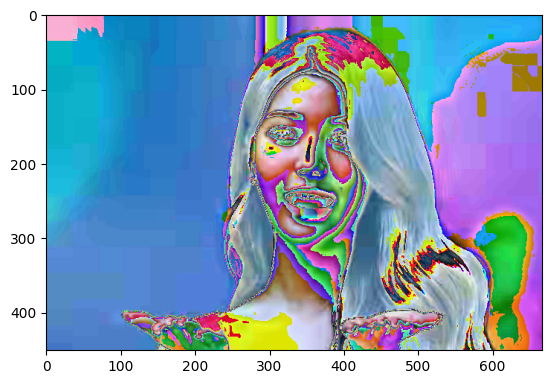

In [77]:
transform = transforms.Compose(
    [
        transforms.Lambda(lambda img: img.convert("RGB")),  # 4채널 → 3채널 변환
        transforms.ColorJitter(
            brightness=0.3, contrast=0.3,
            saturation=0.3, hue=0.3
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
        transforms.ToPILImage()
    ]
)

transformed_image = transform(image)
plt.imshow(transformed_image)



In [73]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=1.0, value=0),
    transforms.RandomErasing(p=1.0, value='random'),
    transforms.ToPILImage()
])


In [78]:
from urllib.request import urlretrieve
urlretrieve("https://cdn.imweb.me/upload/S202207202685e30f16e24/8b48c67f8cdf6.jpeg", "/kaggle/working/img_test.jpg")

('/kaggle/working/img_test.jpg', <http.client.HTTPMessage at 0x7cabfc306050>)

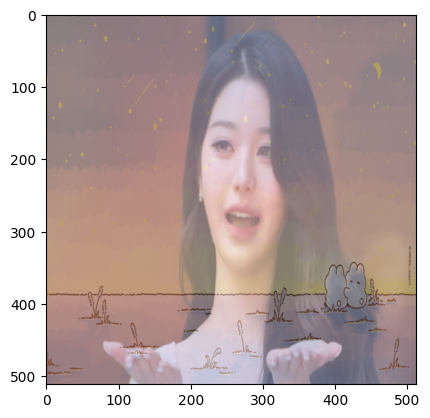

In [80]:
class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

from PIL import Image
import numpy as np

class Mixup:
    def __init__(self, target, scale, alpha=0.5, beta=0.5):
        self.target = target
        self.scale = scale
        self.alpha = alpha
        self.beta = beta

    def __call__(self, image):
        # 4채널(RGBA) 이미지를 3채널(RGB)로 변환
        image = np.array(image.convert('RGB'))
        target = self.target.resize(self.scale).convert('RGB')
        target = np.array(target)
        mix_image = image * self.alpha + target * self.beta
        return Image.fromarray(mix_image.astype(np.uint8))

# 변환 파이프라인 예시
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    Mixup(
        target=Image.open("/kaggle/working/img_test.jpg"),
        scale=(512, 512),
        alpha=0.5,
        beta=0.5
    )
])

# 사용 예시
# transformed_image = transform(image)
# plt.imshow(transformed_image)



transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        Mixup(
            target=Image.open("/kaggle/working/img_test.jpg"),
            scale=(512, 512),
            alpha=0.5,
            beta=0.5
        )
    ]
)
transformed_image = transform(image)
plt.imshow(transformed_image)

